# Import Toolkit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/AI_Advanced_CK/NLP/1_Chat') # Chỉ định nơi làm việc (terminal)

In [ ]:
!pip install pyvi

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyvi import ViTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle # để ghi file nhị phân
import nltk
from keras.layers import Dense, Embedding, LSTM, Dropout,SimpleRNN,LSTM,Bidirectional
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import tensorflow as tf
from keras.models import model_from_json

# Prepare Dataset

In [ ]:
data = pd.read_excel('./Data4.xlsx')

In [ ]:
X = data["question"]
Y = data["answer"]

# Thêm một câu hỏi và một đáp án mới
new_question = "nguyễn văn mạnh là ai vậy ?"
new_answer = "nguyễn văn mạnh là sinh viên trường Đại học Bách Khoa khóa 2020 lớp 20T1 giới tính: Nam quê quán: Thừa Thiên Huế"

for i in range(100):
  X = pd.concat([X, pd.Series([new_question])], ignore_index=True)
  Y = pd.concat([Y, pd.Series([new_answer])], ignore_index=True)

print(len(X))
print(X)
print(len(Y))
print(Y)

2160
0                      Tạm biệt bot
1                           Goodbye
2              Tạm biệt mày nhé bot
3                     Chào tạm biệt
4          Ngày mai gặp lại nhé bot
                   ...             
2155    nguyễn văn mạnh là ai vậy ?
2156    nguyễn văn mạnh là ai vậy ?
2157    nguyễn văn mạnh là ai vậy ?
2158    nguyễn văn mạnh là ai vậy ?
2159    nguyễn văn mạnh là ai vậy ?
Length: 2160, dtype: object
2160
0                                                     bye
1                                                     bye
2                                                     bye
3                                                     bye
4                                                     bye
                              ...                        
2155    nguyễn văn mạnh là sinh viên trường Đại học Bá...
2156    nguyễn văn mạnh là sinh viên trường Đại học Bá...
2157    nguyễn văn mạnh là sinh viên trường Đại học Bá...
2158    nguyễn văn mạnh là sinh viên trường 

## Encoder label

In [ ]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(Y)

num_classes = len(np.unique(labels_encoded))
num_classes

100

In [ ]:
# Chuyển nhãn sang dạng one-hot encoding
labels_one_hot = to_categorical(labels_encoded, num_classes=num_classes)

In [ ]:
labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Tiền xử lý

In [ ]:
def tienxuly(document):
  document = ViTokenizer.tokenize (document)
  # đưa về lower
  document = document.lower()
  # xóa các ký tự không cần thiết
  document = re.sub (r'[^\s\wáàảãạắằẳẵặấầẩẫậéèẻẽẹếềểễệóòỏõọốồổỗộớờởỡợíìỉĩịúùủũụứừửữựýỳỷỹỵđ_]',' ',document)
  # xóa khoảng trắng thừa
  document = re.sub (r'\s+', ' ', document).strip()
  return document

In [ ]:
for i in range(0, len(X)):
  X[i]= tienxuly(X[i])
X[0:10]

0                         tạm_biệt bot
1                              goodbye
2                 tạm_biệt mày nhé bot
3                        chào tạm_biệt
4             ngày_mai gặp lại nhé bot
5                                adios
6           tạm_biệt tạm_biệt tạm_biệt
7                        see you again
8                     tạm_biệt mày nhé
9    xin chào tạm_biệt anh bạn của tôi
dtype: object

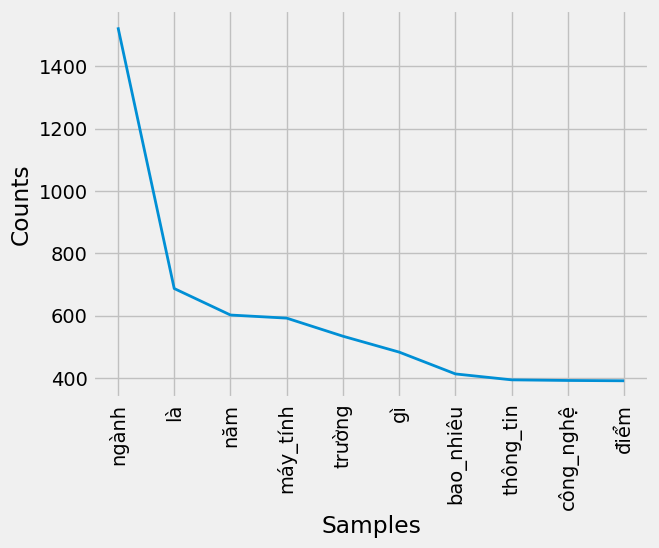

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
tokens = []
for i in range(0, len(X)):
  for j in X[i].split():
    tokens.append(j)
freq = nltk. FreqDist(tokens)
freq.plot(10, cumulative=False)

In [ ]:
# https://viblo.asia/p/xu-ly-ngon-ngu-tu-nhien-voi-python-p7-awj53XA8K6m
# Stopwords hiểu đơn giản là các từ có tần số xuất hiện nhiều như the, to
stopwords_file = open("./stop_words_Vietnamese.txt", "r")
content = stopwords_file.read()
stopwords_VN = content.splitlines()
stopwords_file.close()
#print(stopwords_VN)
#stopword trong documents
stopword = ['nghành', 'ngành', 'trường']
stopwords = stopwords_VN + stopword
def remove_stopwords (line):
  words = []
  for word in line.strip().split():
    if word not in stopwords:
      words.append(word)
  return ' ' . join(words)

for i in range(0,len (X)):
  X[i]= remove_stopwords (X[i])

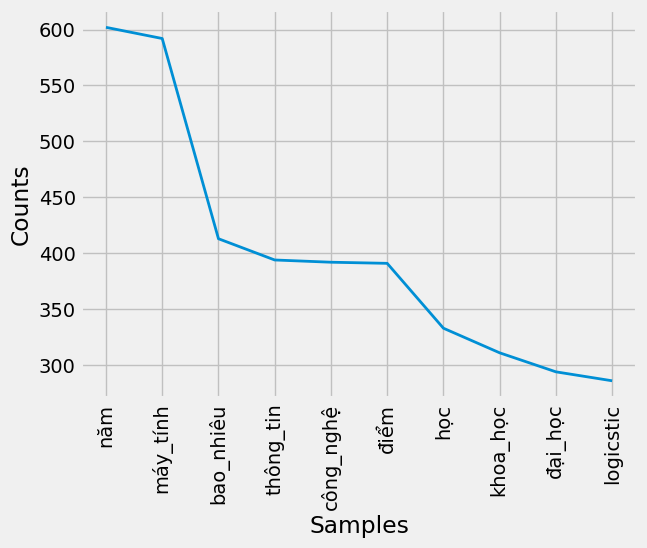

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
tokens = []
for i in range(0, len(X)):
  for j in X[i].split():
    tokens.append(j)
freq = nltk. FreqDist(tokens)
freq.plot(10, cumulative=False)

## Tokenizer

In [ ]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts (X)
# text_to_sequence = tokenizer.texts_to_sequences (X)
# text_to_sequence

from pyvi.ViTokenizer import ViTokenizer
from collections import Counter

# Tokenize văn bản
tokenizer = ViTokenizer()
tokenized_texts = [tokenizer.tokenize(text) for text in X]

# Tạo từ điển (dictionary)
word_counts = Counter()
for text in tokenized_texts:
    for word in text.split():
        word_counts[word] += 1

word_counts = word_counts.most_common()
print(word_counts)
word_dict = {word: index + 1 for index, (word, _) in enumerate(word_counts)}
print(word_dict)
# Ánh xạ văn bản thành danh sách các chỉ số số nguyên
text_to_sequence = []
for text in tokenized_texts:
    sequence = []
    for word in text.split():
        if word in word_dict:
            sequence.append(word_dict[word])
    text_to_sequence.append(sequence)

print(text_to_sequence)


[('năm', 602), ('máy_tính', 592), ('bao_nhiêu', 413), ('thông_tin', 394), ('công_nghệ', 392), ('điểm', 391), ('học', 333), ('khoa_học', 311), ('đại_học', 294), ('logicstic', 286), ('kĩ_thuật', 282), ('đông_á', 255), ('đầu_vào', 255), ('điểm_chuẩn', 221), ('đào_tạo', 211), ('làm', 201), ('xét', 199), ('tuyển', 199), ('nào', 163), ('2022', 145), ('khmt', 141), ('ktpm', 134), ('httt', 133), ('tốt_nghiệp', 133), ('2020', 123), ('tôi', 122), ('2018', 118), ('2019', 111), ('ai', 108), ('cntt', 104), ('trong', 101), ('mạnh', 101), ('nguyễn', 100), ('văn', 100), ('sinh_viên', 94), ('tín_chỉ', 93), ('công_việc', 92), ('khoa', 87), ('ở', 77), ('chỉ_tiêu', 72), ('trình_độ', 68), ('ngoại_ngữ', 68), ('thời_gian', 67), ('tổ_hợp', 67), ('trọ', 65), ('mấy', 64), ('ngôn_ngữ', 62), ('lập_trình', 62), ('tốt', 57), ('hình_thức', 56), ('tuyển_sinh', 55), ('bot', 53), ('điều_kiện', 53), ('đạt', 52), ('đồ_án', 52), ('đi', 46), ('đối_tượng', 44), ('lĩnh_vực', 44), ('toán', 44), ('giỏi', 43), ('giá', 40), ('qu

In [ ]:
# Ví dụ qua 5 từ đầu tiên
for i in range(5):
  print("\nMã hóa từ thứ: ",i)
  print("Từ gốc : ",X[i] )
  print("Mã hóa thành các chuỗi số : ", text_to_sequence[i])


Mã hóa từ thứ:  0
Từ gốc :  tạm_biệt bot
Mã hóa thành các chuỗi số :  [117, 52]

Mã hóa từ thứ:  1
Từ gốc :  goodbye
Mã hóa thành các chuỗi số :  [201]

Mã hóa từ thứ:  2
Từ gốc :  tạm_biệt mày nhé bot
Mã hóa thành các chuỗi số :  [117, 82, 136, 52]

Mã hóa từ thứ:  3
Từ gốc :  chào tạm_biệt
Mã hóa thành các chuỗi số :  [109, 117]

Mã hóa từ thứ:  4
Từ gốc :  ngày_mai gặp nhé bot
Mã hóa thành các chuỗi số :  [237, 238, 136, 52]


In [ ]:
#tìm chiều dài của chuỗi dài nhất
max_length_sequence = max([len(i) for i in text_to_sequence])
padded_zeros_sequence = pad_sequences (text_to_sequence, maxlen = max_length_sequence, padding= "pre")
# padding "pre" thêm 8 vào phía trước, Post thêm 9 vào phía sau của text_to_sequence
padded_zeros_sequence

array([[  0,   0,   0, ...,   0, 117,  52],
       [  0,   0,   0, ...,   0,   0, 201],
       [  0,   0,   0, ...,  82, 136,  52],
       ...,
       [  0,   0,   0, ...,  34,  32,  29],
       [  0,   0,   0, ...,  34,  32,  29],
       [  0,   0,   0, ...,  34,  32,  29]], dtype=int32)

## Train - Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_zeros_sequence, labels_one_hot, test_size=0.1, random_state=0)
X_test.shape
callback = tf.keras.callbacks. EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
# TOT_SIZE = len(tokenizer.word_index)+1
TOT_SIZE = len(word_dict)+1

# Model

## RNN Model

In [ ]:
def RNN_model():
  model = Sequential()
  model.add(Embedding (input_dim=TOT_SIZE, output_dim= 16, input_length=max_length_sequence))
  model.add(SimpleRNN(300))
  model.add(Dense (200, activation='relu'))
  model.add(Dense (num_classes, activation='softmax')) #num_classes = 99
  return model

rnn_model = RNN_model()
rnn_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 13, 16)            4960      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 300)               95100     
                                                                 
 dense_6 (Dense)             (None, 200)               60200     
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
Total params: 180360 (704.53 KB)
Trainable params: 180360 (704.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- input_dim là output của lớp trước
- Embedding : Param = embedding*vocab_size = 16 * 310 = 4960          
- SimpleRNN : Param = (units * units + units * input_dim + units) = (300 * 300 + 300 * 16 + 300) =  95100 (output của lớp trước = 16 chính là embending)
- Dense : Param = output_dim * input_dim + output_dim = 200 * 300 + 200 = 60200 (mấy lớp FC thì cũng tính giống như bên CNN)
- Dense : Param = output_dim * input_dim + output_dim = 100 * 200 + 100 = 20100

- Total Param = 4960 + 95100 + 60200 + 20100 = 180360

In [ ]:
print(X_train.shape, Y_train.shape)

(1944, 13) (1944, 100)


## BiLSTM

In [ ]:
def Bidirectional_model():
  model = Sequential()
  model.add(Embedding (input_dim=TOT_SIZE, output_dim= 16, input_length=max_length_sequence))
  model.add(Bidirectional (LSTM(500)))
  model.add(Dense (400, activation='relu'))
  model.add(Dense (300, activation='relu'))
  model.add(Dense (200, activation='relu'))
  model.add(Dense (num_classes, activation='softmax'))
  return model

bilstm_model = Bidirectional_model()
bilstm_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
bilstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 13, 16)            4960      
                                                                 
 bidirectional_1 (Bidirecti  (None, 1000)              2068000   
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 400)               400400    
                                                                 
 dense_9 (Dense)             (None, 300)               120300    
                                                                 
 dense_10 (Dense)            (None, 200)               60200     
                                                                 
 dense_11 (Dense)            (None, 100)               20100     
                                                      

( bidirectional (Bidirectional (None, 1000) thì unit là 500))
- input_dim là output của lớp trước
- Embedding : Param = embedding*vocab_size = 16 * 310 = 4960          
- BiLSTM = LSTM * 2 = RNN * 4 * 2  : Param = (units * units + units * input_dim + units) * 4 * 2 = (500 * 500 + 500 * 16 + 500) * 4 * 2  =  24704 * 4 = 2068000 (output của lớp trước = 16 chính là embending)
- Dense : Param = output_dim * input_dim + output_dim = 400 * 1000 + 400 = 400400 (mấy lớp FC thì cũng tính giống như bên CNN)
- Dense : Param = output_dim * input_dim + output_dim = 300 * 400 + 300 = 120300
- Dense : Param = output_dim * input_dim + output_dim = 200 * 300 + 200 = 60200
- Dense : Param = output_dim * input_dim + output_dim = 100 * 200 + 100 = 20100
- Total Param = 4960 + 2068000 + 400400 + 120300 + 60200 + 20100 = 2673960

# Training

In [ ]:
# model = model1
# model = rnn_model
# model = lstm_model
model = rnn_model
# model = bilstm_model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Manh_Save/RNN_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

H = model.fit(X_train, Y_train, epochs=10, batch_size=16,
                            validation_data=(X_test, Y_test),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
122/122 [==============================] - ETA: 0s - loss: 4.3907 - accuracy: 0.0556
Epoch 1: val_loss improved from inf to 4.13554, saving model to ./Manh_Save/RNN_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 9s 46ms/step - loss: 4.3907 - accuracy: 0.0556 - val_loss: 4.1355 - val_accuracy: 0.0926
Epoch 2/10
122/122 [==============================] - ETA: 0s - loss: 3.5955 - accuracy: 0.1667
Epoch 2: val_loss improved from 4.13554 to 3.36191, saving model to ./Manh_Save/RNN_model.h5
122/122 [==============================] - 5s 45ms/step - loss: 3.5955 - accuracy: 0.1667 - val_loss: 3.3619 - val_accuracy: 0.2176
Epoch 3/10
121/122 [============================>.] - ETA: 0s - loss: 2.7191 - accuracy: 0.2691
Epoch 3: val_loss improved from 3.36191 to 2.49669, saving model to ./Manh_Save/RNN_model.h5
122/122 [==============================] - 6s 46ms/step - loss: 2.7202 - accuracy: 0.2690 - val_loss: 2.4967 - val_accuracy: 0.3565
Epoch 4/10
122/122 [==============================] - ETA: 0s - loss: 2.0039 - accuracy: 0.4285
Epoch 4: val_loss improved from 2.49669 to 1.94614, saving model to ./Manh_Save/RNN_model.h5
122/122 [============================

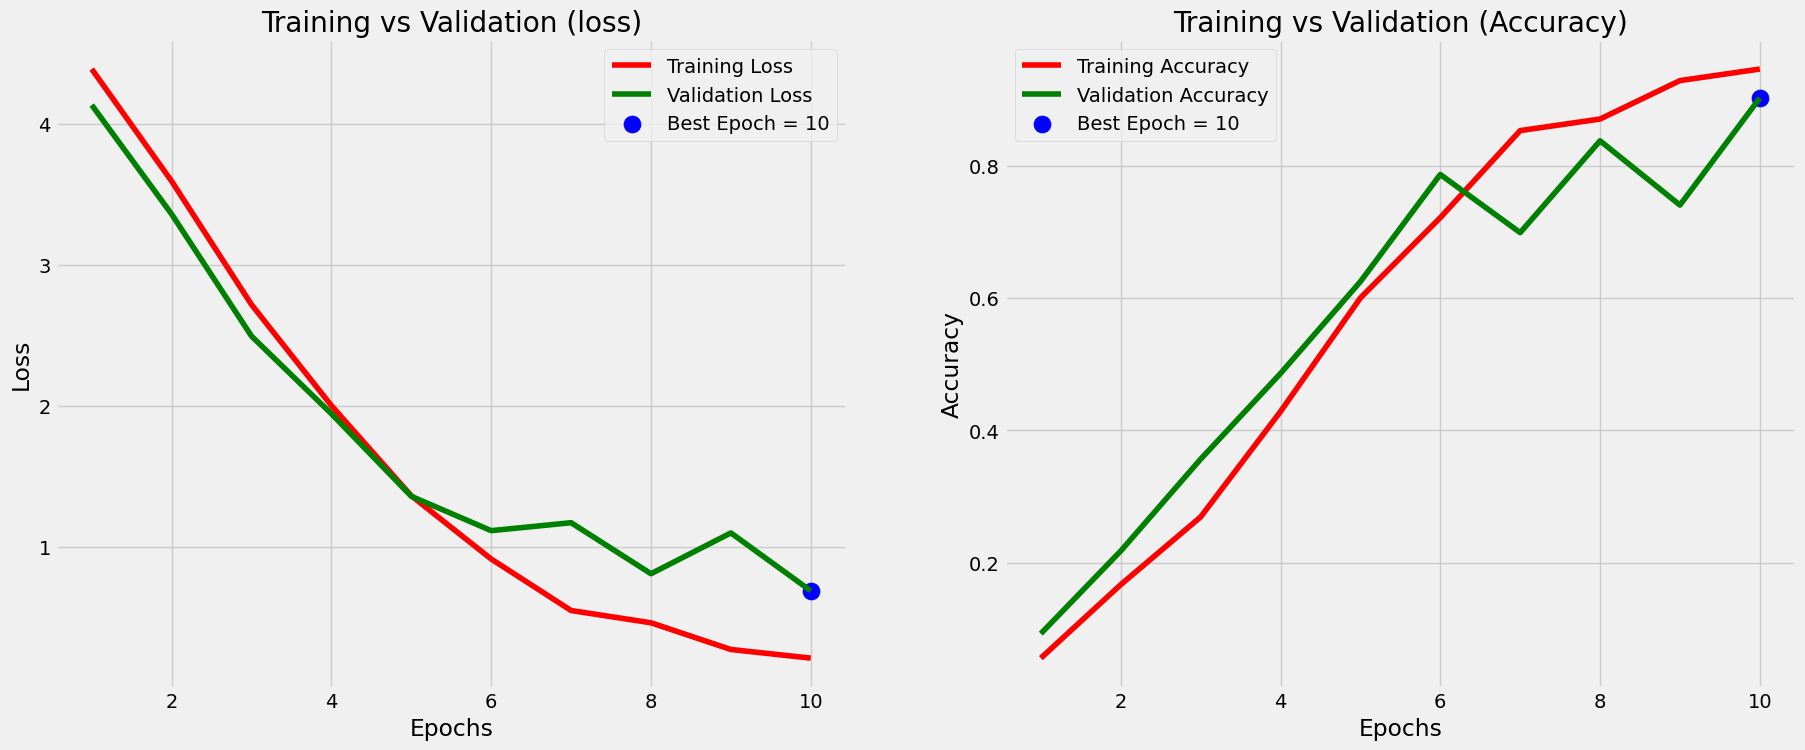

In [ ]:
train_acc = H.history['accuracy']
train_loss = H.history['loss']

val_acc = H.history['val_accuracy']
val_loss = H.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Test

In [ ]:
def textsToSequences(text):
    sequence = []
    for word in text.split():
        if word in word_dict:
            sequence.append(word_dict[word])
    return sequence

## Write TSV


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape

(310, 16)

In [ ]:
print(len(word_dict))

309


In [ ]:
import io
out_v = io.open('./Manh_Save/vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('./Manh_Save/meta.tsv', 'w', encoding = 'utf-8')
for word, value in word_dict.items():
  # vector = weights[key]
  out_m.write(word + '\n')
  # out_v.write('\t'.join([str(x) for x in vector]) + '\n')
out_m.close()
out_v.close()

## Predict

In [ ]:
new_question = "nguyễn văn mạnh là ai vậy ?"

# Tiền xử lý câu hỏi mới
new_question = tienxuly(new_question)
new_question = remove_stopwords(new_question)

# Chuyển câu hỏi thành vector
new_sequence = [textsToSequences(new_question)]
new_padded = pad_sequences(new_sequence, maxlen=max_length_sequence, padding="pre")

# Dự đoán câu trả lời
prediction = model.predict(new_padded)

# Chuyển đổi nhãn dự đoán từ one-hot encoding về dạng số
predicted_labels_encoded = np.argmax(prediction, axis=1)
# Chuyển đổi nhãn từ dạng số về dạng chuỗi
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)
# In ra một số nhãn dự đoán
print("Predicted labels (first 10):", predicted_labels[0])

1/1 [==============================] - 0s 172ms/step
Predicted labels (first 10): nguyễn văn mạnh là sinh viên trường Đại học Bách Khoa khóa 2020 lớp 20T1 giới tính: Nam quê quán: Thừa Thiên Huế


## WEIGHT

In [ ]:
word = "mạnh"
try:
    word_index_in_vocab = word_dict[word]
    weights = model.layers[0].get_weights()[0]
    print(weights[word_index_in_vocab])
except:
  print("Từ này không có trong từ điển")


[ 0.13989301  0.172652   -0.15284868 -0.02842761 -0.11254134 -0.29338425
 -0.12329954 -0.14168432  0.12196313 -0.12788656 -0.19958639  0.14744952
 -0.11477266  0.02262302  0.10961173  0.18874274]


## Embedings Câu

In [ ]:
new_question = "nguyễn văn mạnh là ai vậy ?"

# Tiền xử lý câu hỏi mới
new_question = tienxuly(new_question)
new_question = remove_stopwords(new_question)

# Chuyển câu hỏi thành vector
# new_sequence = tokenizer.texts_to_sequences([new_question])
new_sequence = [textsToSequences(new_question)]
new_padded = pad_sequences(new_sequence, maxlen=max_length_sequence, padding="pre")

modelx = Sequential()
modelx.add(Embedding (input_dim=TOT_SIZE, output_dim= 16, input_length=max_length_sequence))

# Lấy embedding của chuỗi
embeddings = modelx.predict(new_padded)
print("Embeddings:", embeddings)

1/1 [==============================] - 0s 49ms/step
Embeddings: [[[-0.01266916  0.04702109  0.04666047 -0.03208794  0.03566008
    0.04777071  0.02208365 -0.01933743  0.025502    0.00946544
   -0.01787088 -0.0051844   0.04414682 -0.0370701  -0.0185055
    0.02735842]
  [-0.01266916  0.04702109  0.04666047 -0.03208794  0.03566008
    0.04777071  0.02208365 -0.01933743  0.025502    0.00946544
   -0.01787088 -0.0051844   0.04414682 -0.0370701  -0.0185055
    0.02735842]
  [-0.01266916  0.04702109  0.04666047 -0.03208794  0.03566008
    0.04777071  0.02208365 -0.01933743  0.025502    0.00946544
   -0.01787088 -0.0051844   0.04414682 -0.0370701  -0.0185055
    0.02735842]
  [-0.01266916  0.04702109  0.04666047 -0.03208794  0.03566008
    0.04777071  0.02208365 -0.01933743  0.025502    0.00946544
   -0.01787088 -0.0051844   0.04414682 -0.0370701  -0.0185055
    0.02735842]
  [-0.01266916  0.04702109  0.04666047 -0.03208794  0.03566008
    0.04777071  0.02208365 -0.01933743  0.025502    0.009

## Embedings Từ

In [ ]:
word = "mạnh"
try:
  word_index_in_vocab = word_dict[word]
  print(f"Chỉ số của từ '{word}':", word_index_in_vocab)  # Chỉ số của từ 'thích': 4
  # Tạo chuỗi chứa chỉ số của từ (dạng mảng 2D để phù hợp với yêu cầu của mô hình)
  word_sequence = np.array([[word_index_in_vocab]])
  print("Chuỗi chứa chỉ số của từ:", word_sequence)
  # Tính toán embedding cho từ
  embedding_of_word = modelx.predict(word_sequence)
  print(f"Embedding của từ '{word}':", embedding_of_word)
except:
  print("Từ này không có trong từ điển")

Chỉ số của từ 'mạnh': 32
Chuỗi chứa chỉ số của từ: [[32]]


1/1 [==============================] - 0s 47ms/step
Embedding của từ 'mạnh': [[[ 0.02089164  0.01296012  0.01062051  0.03027907 -0.04831855
   -0.01114834 -0.04800683  0.00786685  0.01721294  0.04937822
   -0.04611864  0.03250364  0.03440959  0.00971983  0.03620749
   -0.04779292]]]
